<a href="https://colab.research.google.com/github/Maxalexandre12/ArvoredeDecisao/blob/main/ArvoreDeDecisao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: espécies, dtype: int64
comprimento da sépala (cm)    float64
largura da sépala (cm)        float64
comprimento da pétala (cm)    float64
largura da pétala (cm)        float64
espécies                       object
dtype: object
[0.         0.01939657 0.31999645 0.66060698]
relatório de classificação :
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       0.92      0.96      0.94        23
 Iris-virginica       0.95      0.90      0.93        21

       accuracy                           0.95        60
      macro avg       0.96      0.95      0.95        60
   weighted avg       0.95      0.95      0.95        60

matriz de confusão :
 [[16  0  0]
 [ 0 22  1]
 [ 0  2 19]]
Precisão do classificador: 95.0%
Éspecie prevista para a amostra 1: Iris-setosa
Éspecie prevista para a amostra 2: Iris-versicolor
Éspecie prevista para a amostra 3

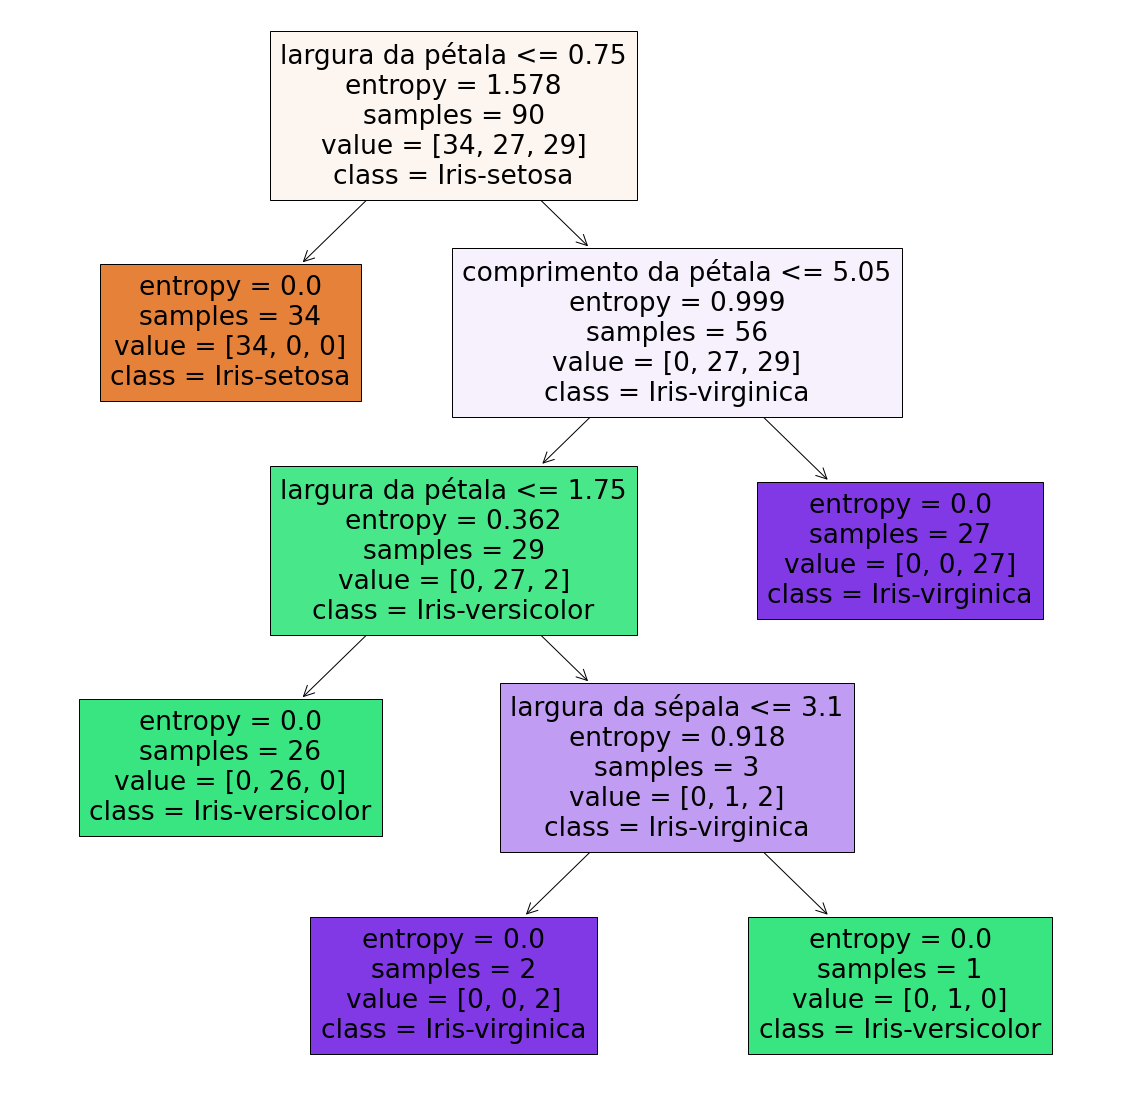

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier

nomes_colunas = ['comprimento da sépala (cm)', 'largura da sépala (cm)', 'comprimento da pétala (cm)', 'largura da pétala (cm)', 'espécies']
dados = pd.read_csv("iris.csv", names = nomes_colunas)

print(dados.espécies.value_counts())
print(dados.dtypes)

X = dados[['comprimento da sépala (cm)', 'largura da sépala (cm)', 'comprimento da pétala (cm)', 'largura da pétala (cm)']].values
y = dados['espécies'].values
Xtr, Xtes, ytr, ytes = train_test_split(X, y, test_size=0.4, random_state=0)

classificador = DecisionTreeClassifier(criterion='entropy', max_depth=4)
classificador.fit(Xtr,ytr)

print(classificador.feature_importances_) 

ytr = classificador.predict(Xtes)
acertos = accuracy_score(ytes, ytr)

print('relatório de classificação :\n',classification_report(ytes, ytr))
print('matriz de confusão :\n',confusion_matrix(ytes, ytr))
print("Precisão do classificador: {}%" .format(round(acertos * 100, 2)))

atributos = ['comprimento da sépala', 'largura da sépala', 'comprimento da pétala', 'largura da pétala']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize = (20,20))
tree.plot_tree(classificador, feature_names=atributos, class_names=classificador.classes_, filled=True);

previsão1 = classificador.predict([[5.1, 5.7, 5.3, 0.1]])
previsão2 = classificador.predict([[4.1, 4.7, 4, 1.5]])
previsão3 = classificador.predict([[5.1, 6.7, 6, 1.1]])

print(f"Éspecie prevista para a amostra 1: {previsão1.item()}")
print(f"Éspecie prevista para a amostra 2: {previsão2.item()}")
print(f"Éspecie prevista para a amostra 3: {previsão3.item()}")